In [1]:
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

In [3]:
df=pd.read_csv("diabetes.csv")

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


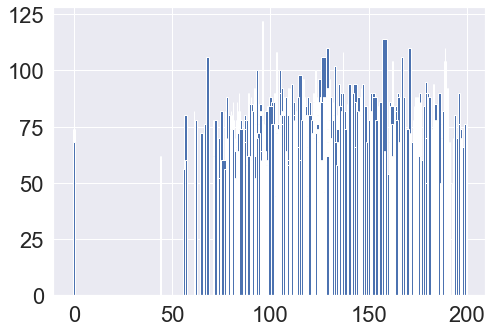

In [107]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Outcome']
ax.bar(df ['Glucose'],df['BloodPressure'],df['Pregnancies'] )
plt.show()

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

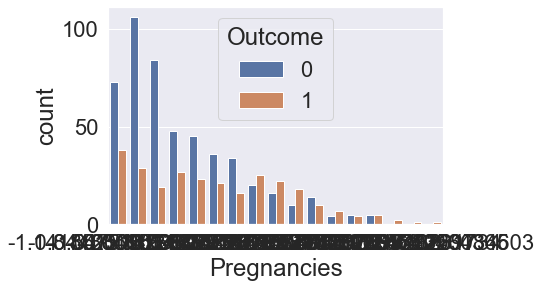

In [108]:
sns.countplot(x='Pregnancies',hue='Outcome',data=df)

<AxesSubplot:xlabel='Age', ylabel='count'>

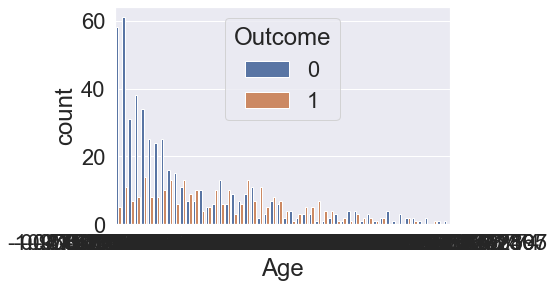

In [109]:
sns.countplot(x='Age',hue='Outcome',data=df)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

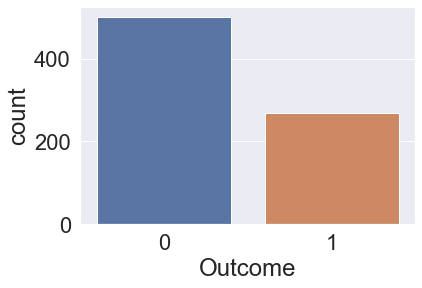

In [110]:
sns.countplot(x='Outcome',data=df)

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

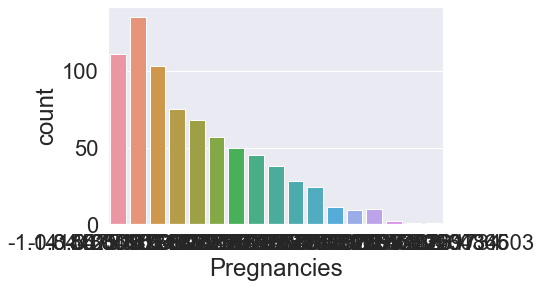

In [111]:
sns.countplot(x='Pregnancies',data=df)

<AxesSubplot:xlabel='Glucose', ylabel='count'>

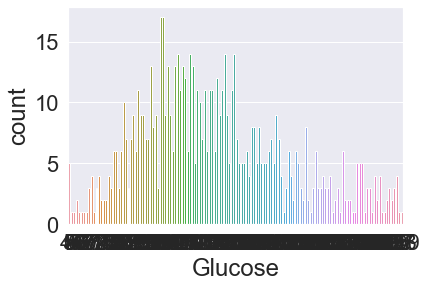

In [112]:
sns.countplot(x='Glucose',data=df)

C:\Users\king\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

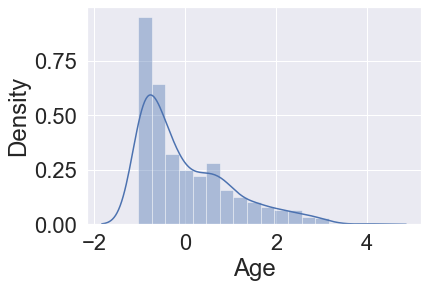

In [113]:
sns.distplot(df['Age'])

C:\Users\king\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

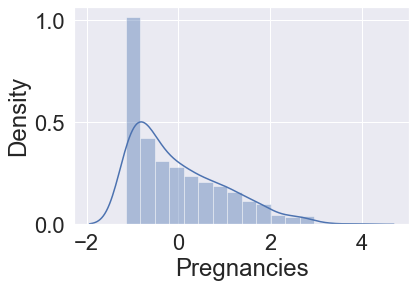

In [114]:
sns.distplot(df['Pregnancies'])

C:\Users\king\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Glucose', ylabel='Density'>

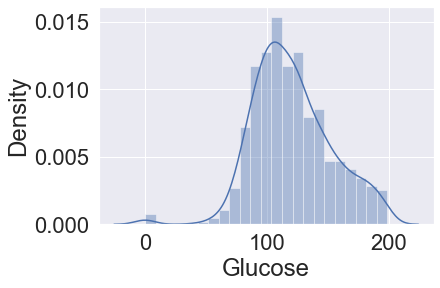

In [115]:
sns.distplot(df['Glucose'])

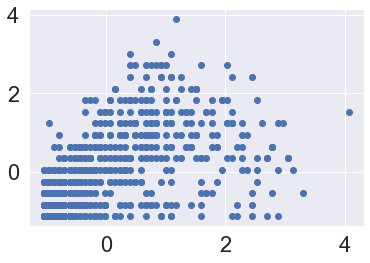

In [116]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df["Age"]=scaler.fit_transform(df[["Age"]].values)
df["Pregnancies"]=scaler.fit_transform(df[["Pregnancies"]].values)

x=df['Age']
y=df['Pregnancies']
plt.scatter(x,y)
plt.show()

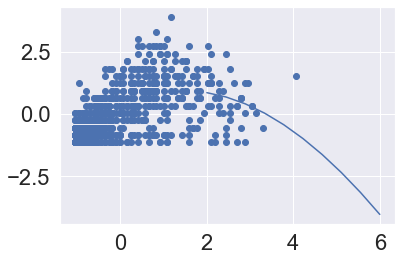

In [117]:
import numpy
import matplotlib.pyplot as plt
x=df['Age']
y=df['Pregnancies']

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(2, 6,10 )

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Pregnancies'>

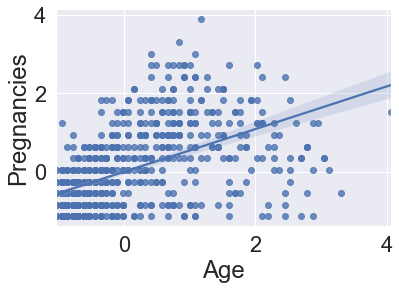

In [118]:
import seaborn as sns
sns.regplot(x='Age',y='Pregnancies',data=df)

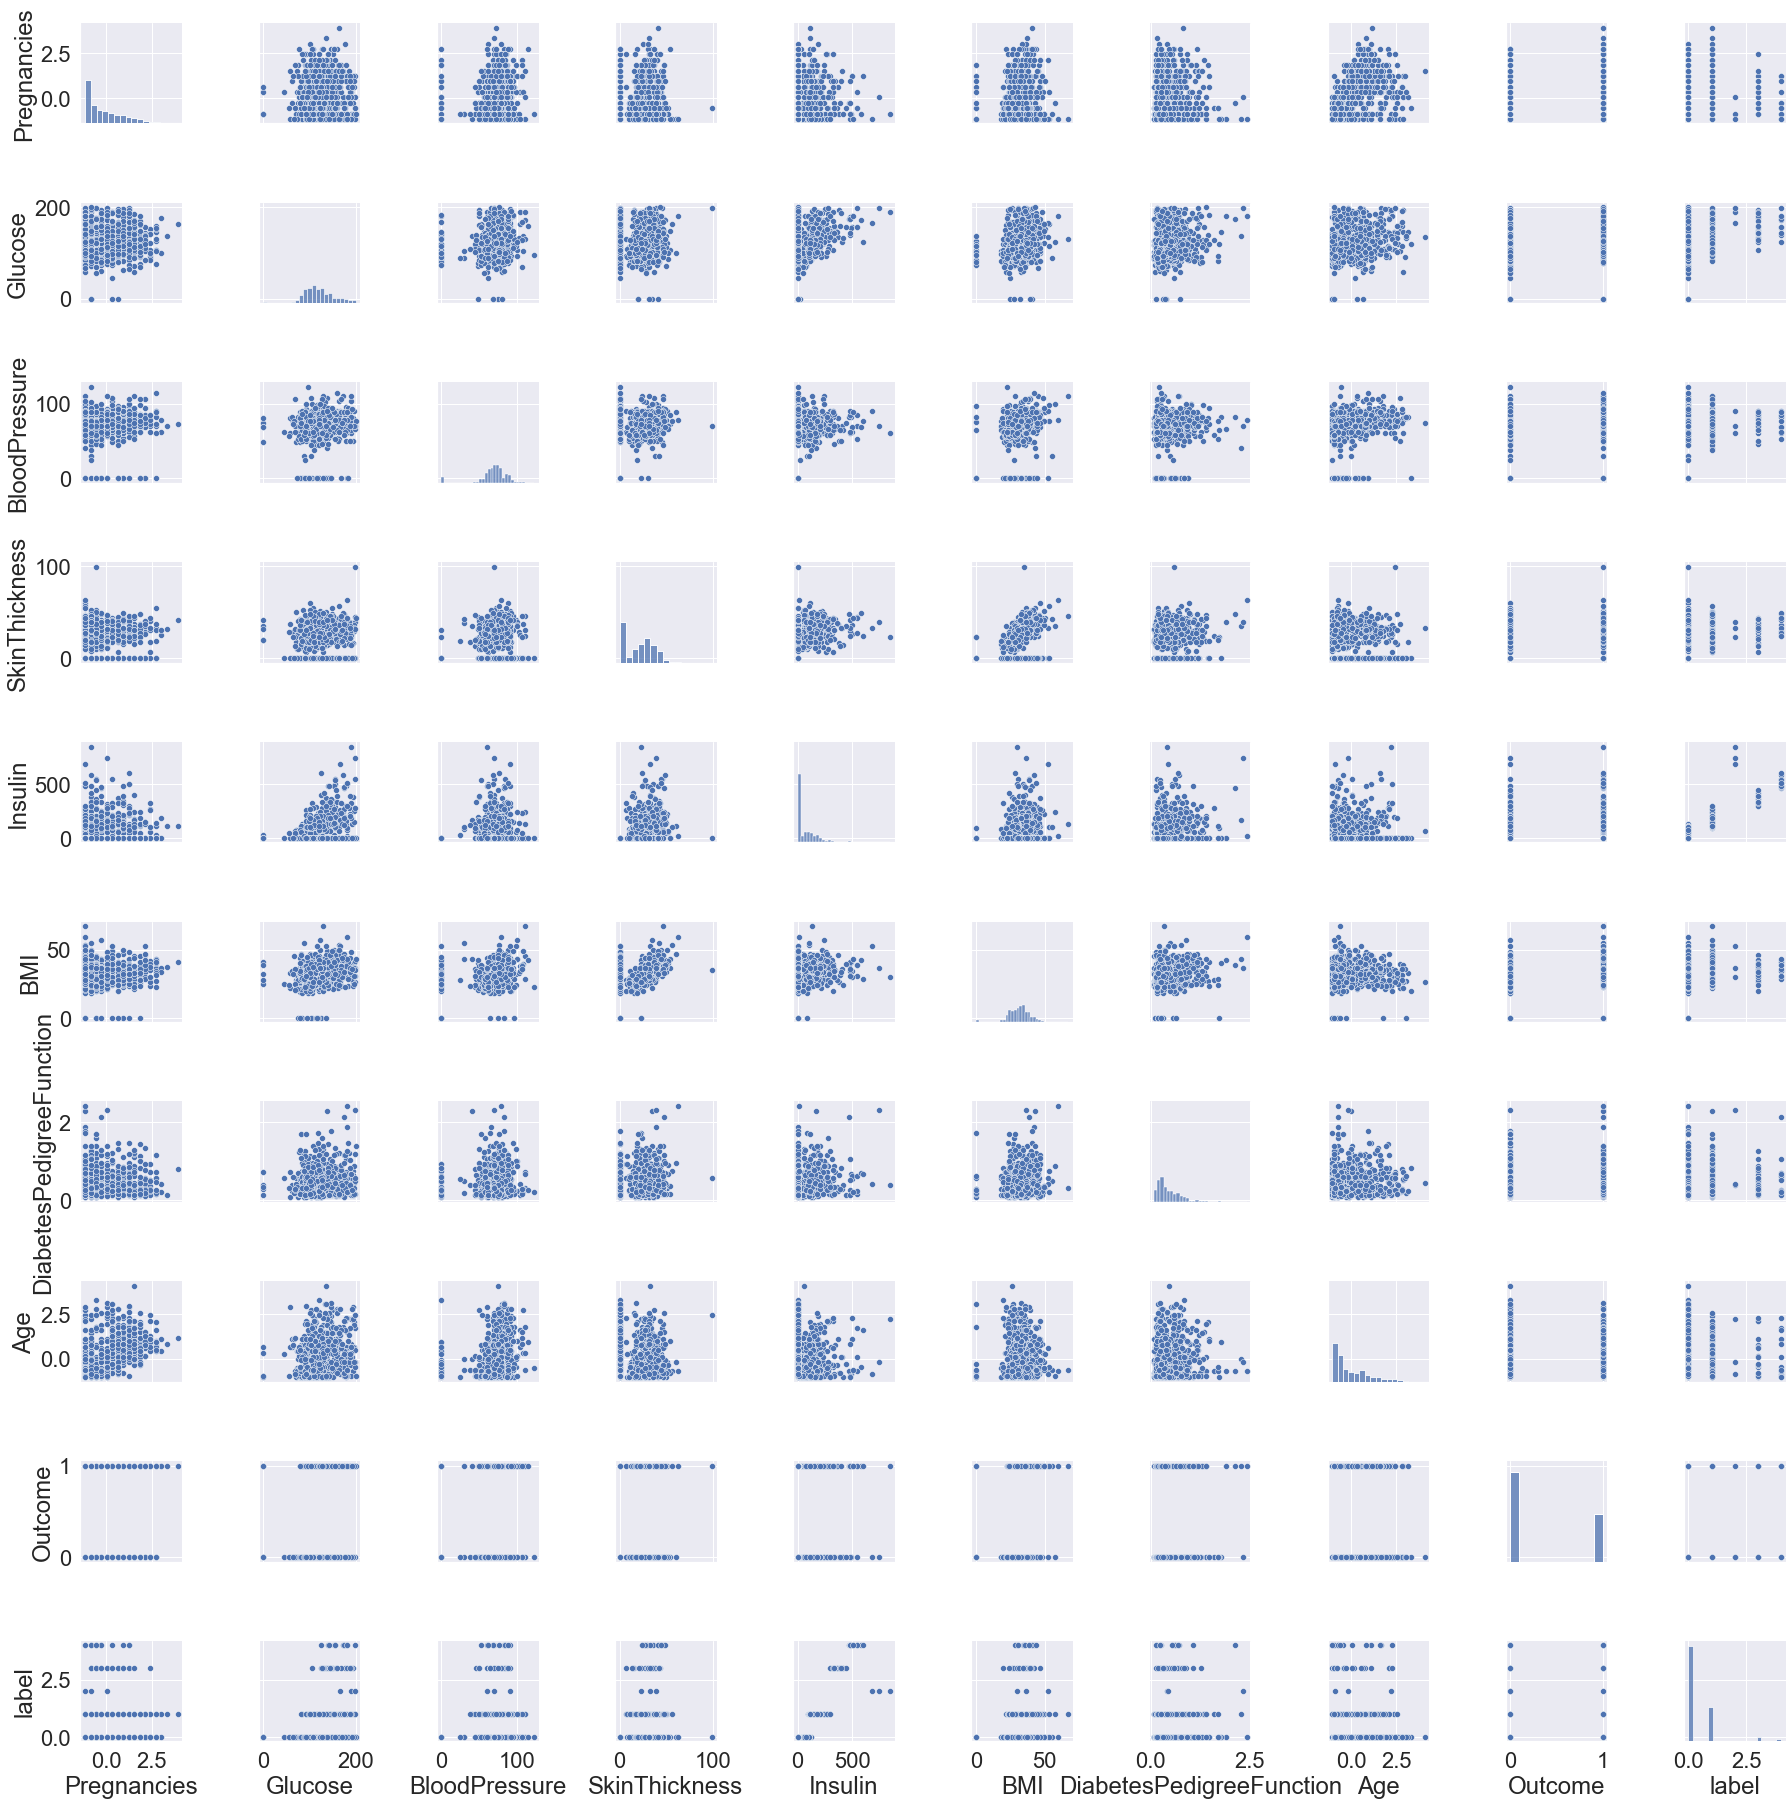

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Calculate and show pairplot
sns.pairplot(df)
plt.tight_layout()

<AxesSubplot:>

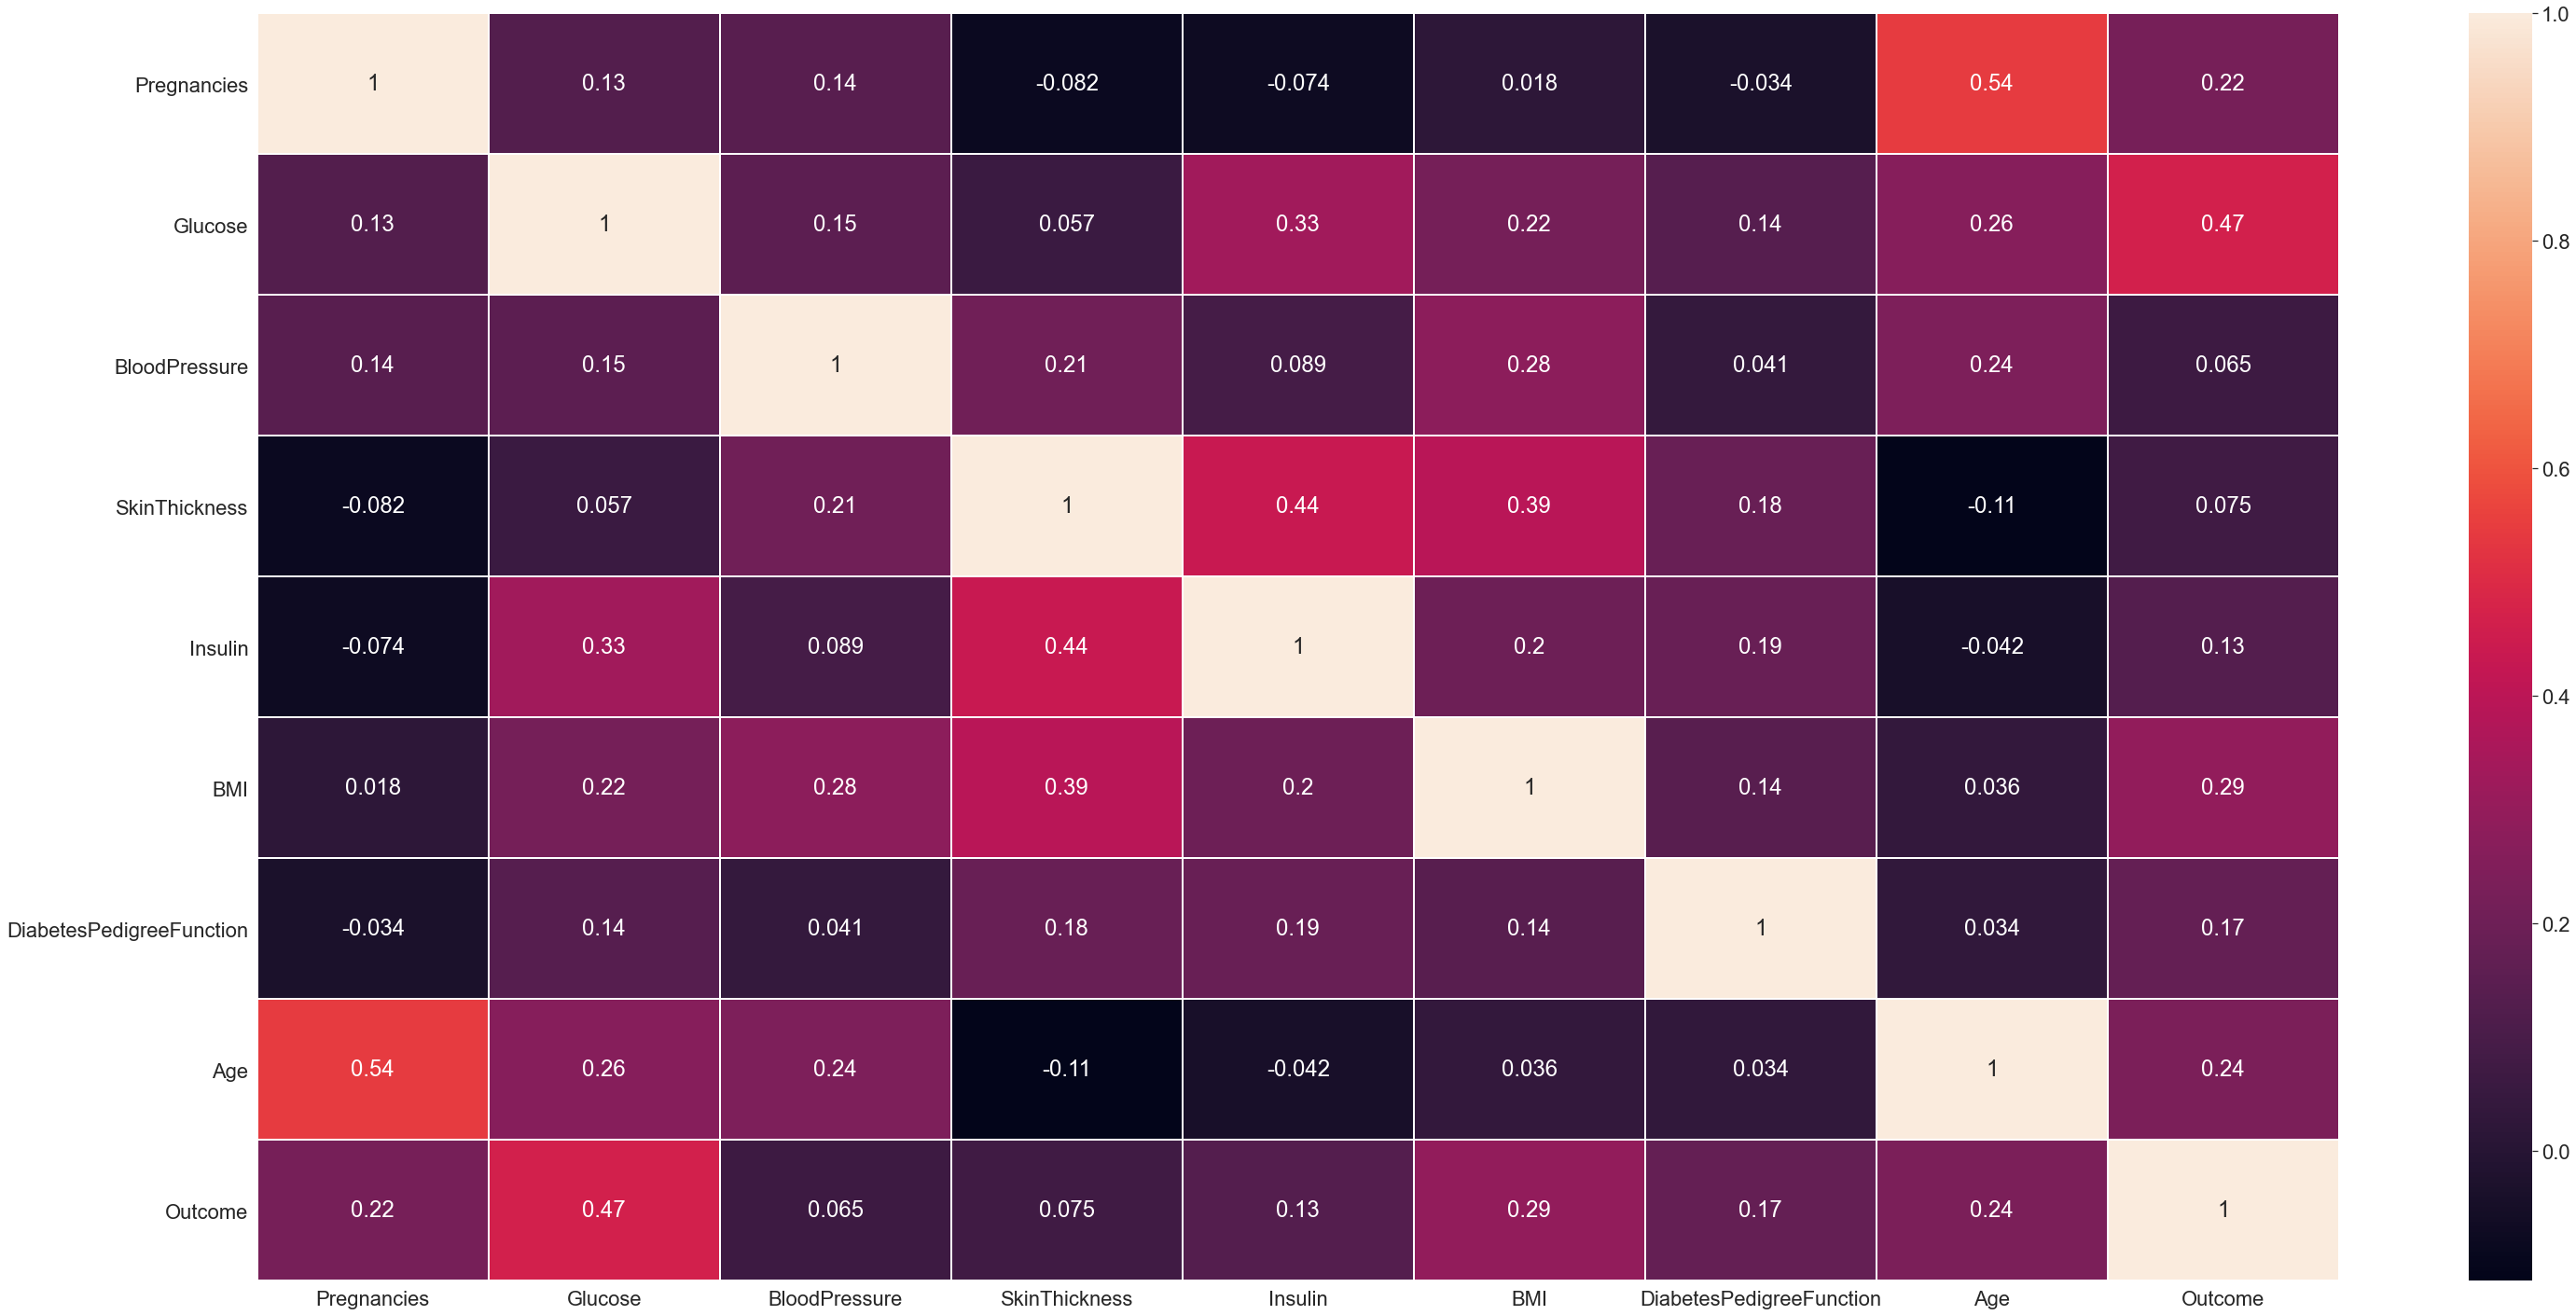

In [8]:
import seaborn as sns
x=df.corr()
sns.set(font_scale=2)
plt.figure(figsize = (50,25))

sns.heatmap(x.iloc[:,:], annot=True, linewidths=.5)

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

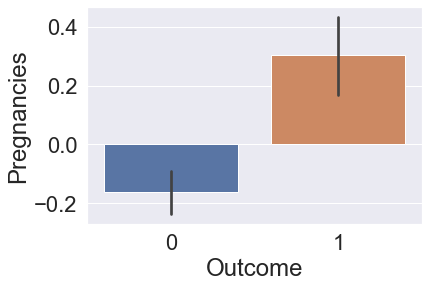

In [60]:
import seaborn as sns
sns.barplot(x='Outcome',y='Pregnancies',data=df)

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

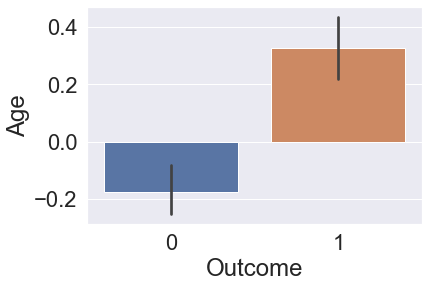

In [63]:
import seaborn as sns
sns.barplot(x='Outcome',y='Age',data=df)

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

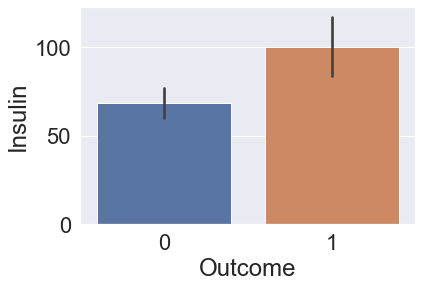

In [64]:
import seaborn as sns
sns.barplot(x='Outcome',y='Insulin',data=df)

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

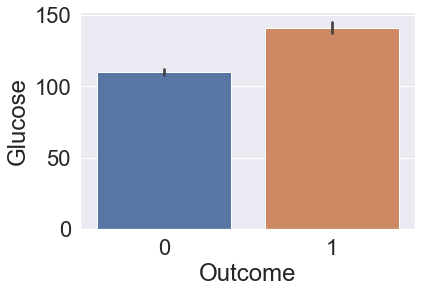

In [65]:
import seaborn as sns
sns.barplot(x='Outcome',y='Glucose',data=df)

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

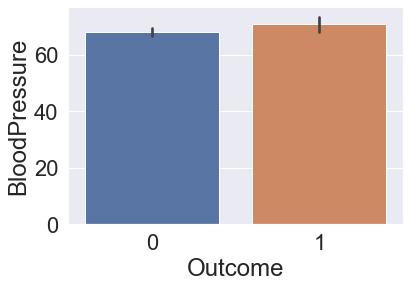

In [66]:
import seaborn as sns
sns.barplot(x='Outcome',y='BloodPressure',data=df)

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

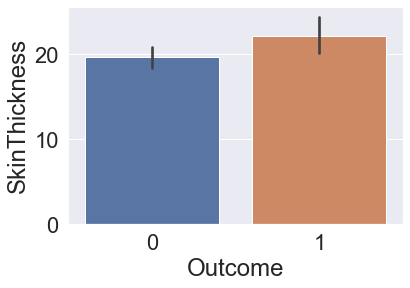

In [67]:
import seaborn as sns
sns.barplot(x='Outcome',y='SkinThickness',data=df)

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

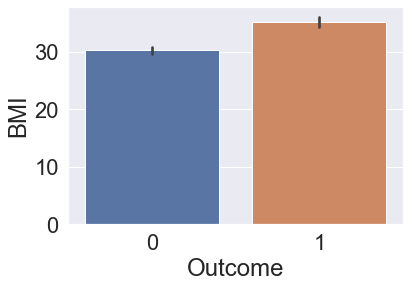

In [68]:
import seaborn as sns
sns.barplot(x='Outcome',y='BMI',data=df)

<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

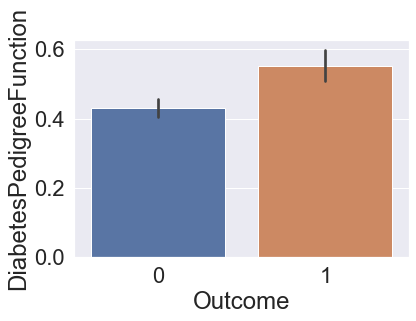

In [69]:
import seaborn as sns
sns.barplot(x='Outcome',y='DiabetesPedigreeFunction',data=df)

In [71]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x = df[['Age', 'Glucose','SkinThickness']]
y = df['Outcome']


In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))


Accuracy=0.73


<AxesSubplot:xlabel='Glucose', ylabel='Outcome'>

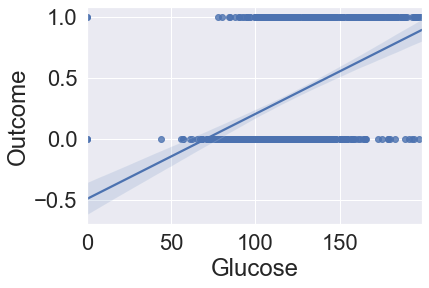

In [77]:
import seaborn as sns
sns.regplot(x='Glucose',y='Outcome',data=df)
#sns.regplot(x='Age',y='Outcome',data=df)
#sns.regplot(x='SkinThickness',y='Outcome',data=df)


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

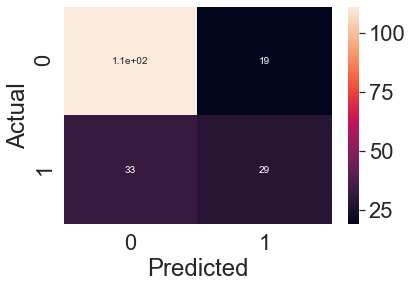

In [78]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)


In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.77      0.85      0.81       130
           1       0.60      0.47      0.53        62

    accuracy                           0.73       192
   macro avg       0.69      0.66      0.67       192
weighted avg       0.72      0.73      0.72       192



In [81]:
#import the relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30) #split our data with test size of 20% 

knn=KNeighborsClassifier(n_neighbors=20) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred,y_test))


Acuuracy= 0.7597402597402597


In [82]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))


Accuracy for k= 1 is: 0.77
Accuracy for k= 2 is: 0.76
Accuracy for k= 3 is: 0.78
Accuracy for k= 4 is: 0.77
Accuracy for k= 5 is: 0.79
Accuracy for k= 6 is: 0.77
Accuracy for k= 7 is: 0.78
Accuracy for k= 8 is: 0.76
Accuracy for k= 9 is: 0.77
Accuracy for k= 10 is: 0.76
Accuracy for k= 11 is: 0.76
Accuracy for k= 12 is: 0.75
Accuracy for k= 13 is: 0.75
Accuracy for k= 14 is: 0.77
Accuracy for k= 15 is: 0.77
Accuracy for k= 16 is: 0.78
Accuracy for k= 17 is: 0.75
Accuracy for k= 18 is: 0.76
Accuracy for k= 19 is: 0.75
Accuracy for k= 20 is: 0.75
Accuracy for k= 21 is: 0.74
Accuracy for k= 22 is: 0.73
Accuracy for k= 23 is: 0.72
Accuracy for k= 24 is: 0.72
Accuracy for k= 25 is: 0.71
Accuracy for k= 26 is: 0.73
Accuracy for k= 27 is: 0.68
Accuracy for k= 28 is: 0.71
Accuracy for k= 29 is: 0.64


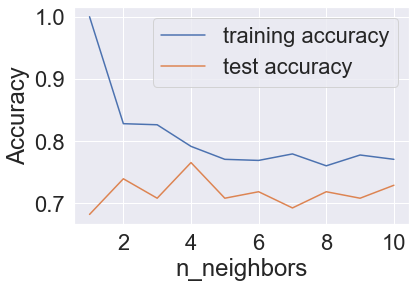

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Outcome'], df['Outcome'], stratify=df['Outcome'], random_state=66)
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

Text(0, 0.5, 'Testing Accuracy')

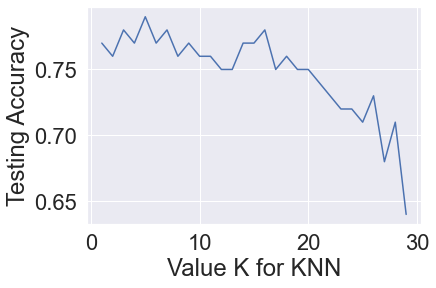

In [83]:
import matplotlib.pyplot as plt
plt.plot(range(1,30),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')


In [89]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#features extraction
x=df.drop(["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin","BMI","DiabetesPedigreeFunction","Age"], axis=1)
y= df["Outcome"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
tree = tree.DecisionTreeClassifier()  
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))


score:1.0


In [91]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(df)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric



In [92]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative


,0
0,0
1,0
2,0
3,0
4,1
...,...
763,1
764,0
765,1
766,0


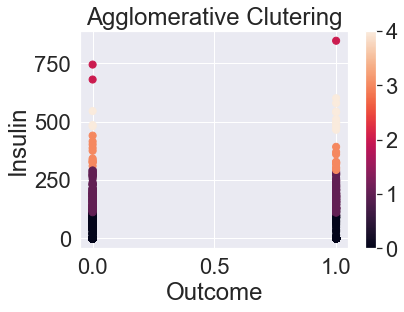

In [94]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (df ['Outcome'] , df ["Insulin"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("Outcome")
ax.set_ylabel("Insulin")
plt.colorbar(scatter)


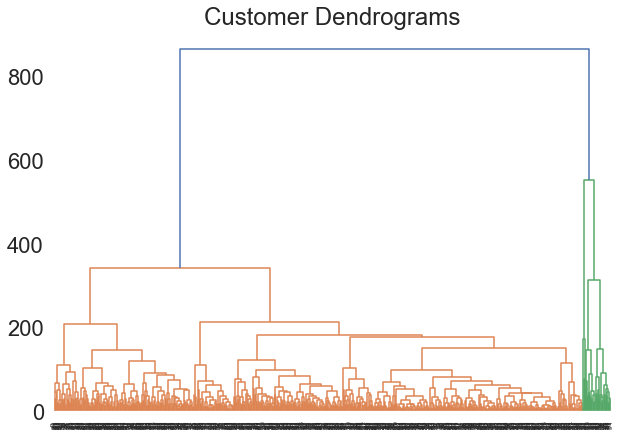

In [95]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(df, method="complete"))


In [119]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

X=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction','Age']] #features
y=df['Outcome']  #target
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3) #splitting data with test size of 30%

clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model




Accuracy: 0.7619047619047619


In [125]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.776


In [126]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))


Accuracy on training set: 0.804
Accuracy on test set: 0.750
